In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [24]:
#!pip install extcolors 
#!pip install colormap 
#!pip install easydev
#!pip install colorgram.py 

In [25]:
import cv2
import extcolors

from colormap import rgb2hex

In [26]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

In [56]:

def exact_color(input_image, resize, tolerance, zoom):
    #background
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)
    
    #resize
    output_width = resize
    '''img = Image.open(input_image)
    if img.size[0] >= resize:
        wpercent = (output_width/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((output_width,hsize), Image.ANTIALIAS)
        resize_name = 'resize_'+ input_image
        img.save(resize_name)
    else:
        resize_name = input_image'''
    
    resize_name = input_image
    #crate dataframe
    img_url = resize_name
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 5)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    print(list_color)
    print(list_precent)
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

['#DFC25A', '#C4281B', '#409CDF', '#397E48']
[6172374, 5081266, 1964754, 1174303]


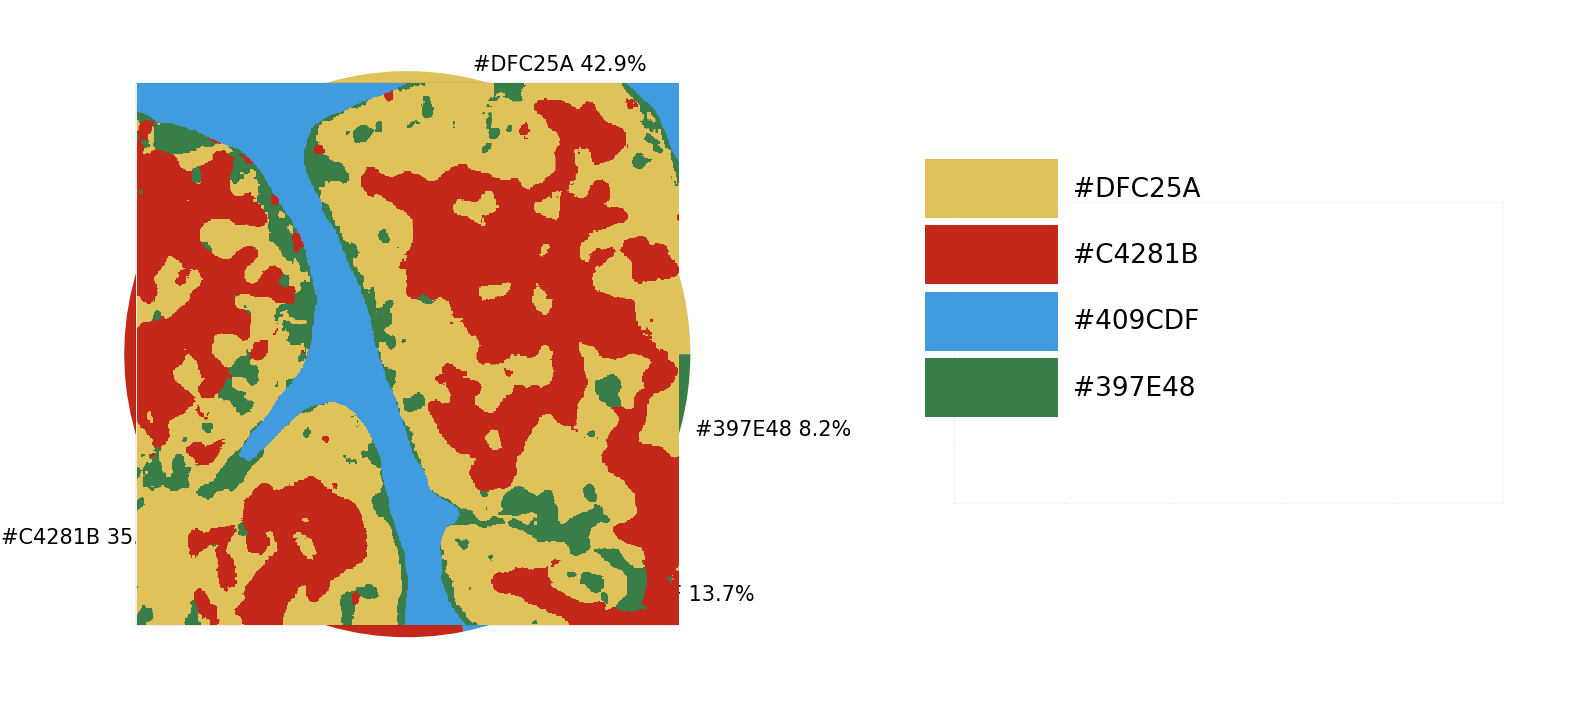

In [67]:
#exact_color('image name', resized_width, tolerance, zoom)
exact_color('/content/Dynamic_15_7_2019_4class.jpg', 100, 0, 1)

In [64]:
lc = ['#DFC25A', '#C4281B', '#409CDF', '#397E48']
lp = [6462045, 5279456, 2005765, 1332309]

In [59]:
for i in lp:
  print(i/sum(lp) * 100)

42.8529650205659
35.01064187816964
13.301203780610527
8.835189320653932


In [105]:
def color_percentages(image_name,tolerance,no_colors):
  bg = 'bg.png'
  fig, ax = plt.subplots(figsize=(192,108),dpi=10)
  fig.set_facecolor('white')
  plt.savefig(bg)
  plt.close(fig)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(100,80), dpi = 10)

  colors_x = extcolors.extract_from_path(image_name, tolerance = tolerance, limit = (no_colors+1))
  df_color = color_to_df(colors_x)

  list_color = list(df_color['c_code'])
  list_precent = [int(i) for i in list(df_color['occurence'])]
  list_percentage = [i/sum(list_precent) for i in list_precent]

  print(list_color,list_percentage)
  x_posi, y_posi, y_posi2 = 160, -170, -170
  for c in list_color:
      if list_color.index(c) <= 5:
          y_posi += 180
          rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
          ax2.add_patch(rect)
          ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
      else:
          y_posi2 += 180
          rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
          ax2.add_artist(rect)
          ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

  fig.set_facecolor('white')
  ax2.axis('off')
  bg = plt.imread('bg.png')
  plt.imshow(bg)       
  plt.tight_layout()
  return plt.show()

  #return list_color,list_percentage


['#397E48', '#C4281B', '#DFC25A', '#409CDF'] [0.4265716467294477, 0.2555357597353016, 0.17281751081700178, 0.14507508271824893]


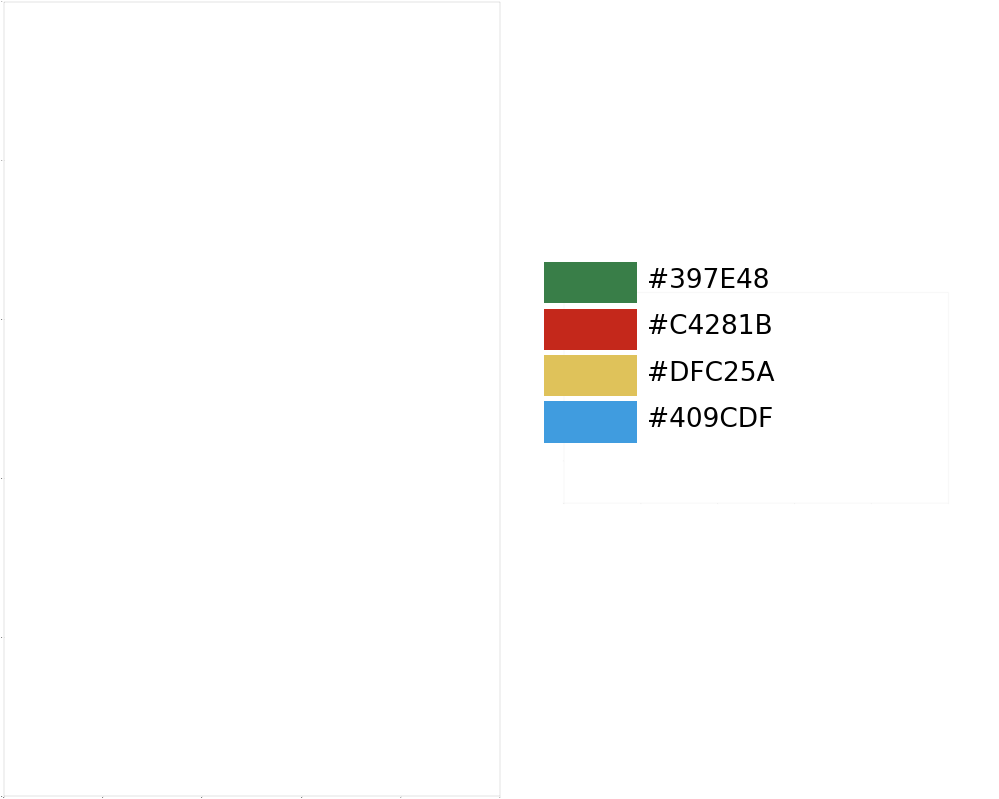

In [106]:
color_percentages('/content/Dynamic_full_2017.JPG',0,4)

['#DFC25A', '#397E48', '#C4281B', '#C2C56E'] [0.340766557600153, 0.28177246344184126, 0.2536972871044787, 0.12376369185352701]


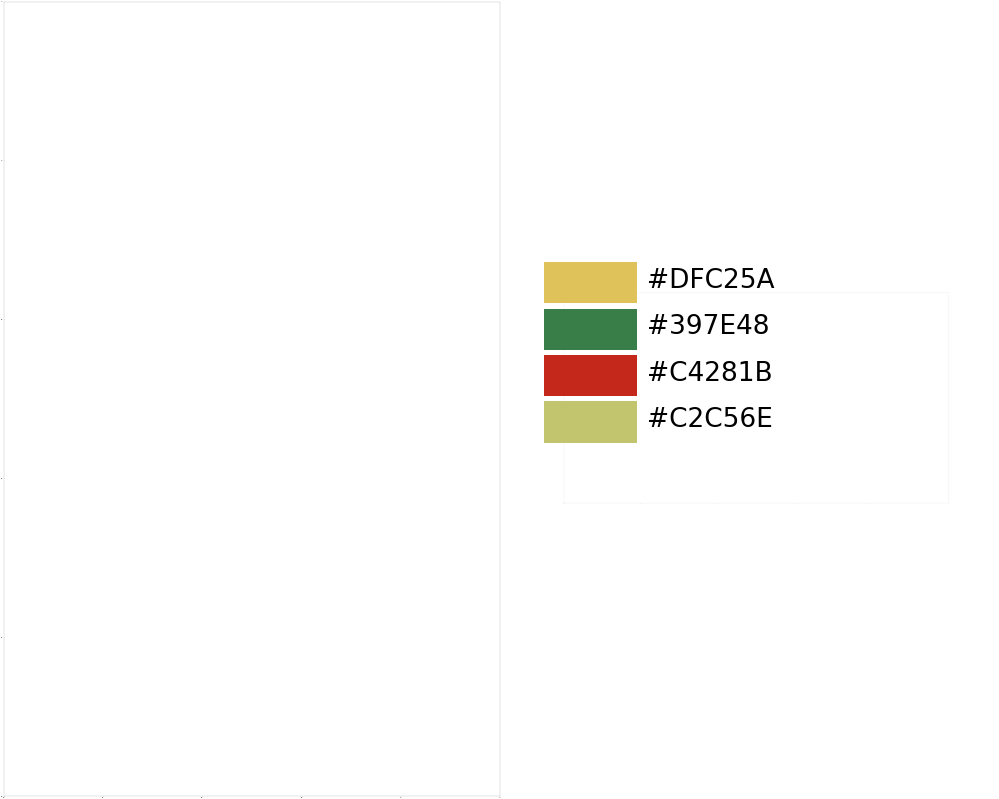

In [110]:
color_percentages('/content/Dynamic_full_2019.JPG',15,4)

In [102]:
colors_x = extcolors.extract_from_path('/content/Dynamic_full_2017.JPG', tolerance = 20, limit = (3+1))
df_color = color_to_df(colors_x)

In [94]:
colors_x

([((223, 194, 90), 414119),
  ((57, 126, 72), 171428),
  ((196, 40, 27), 94288),
  ((195, 204, 121), 90275)],
 1039380)

In [95]:
df_color

,c_code,occurence
0,#DFC25A,414119
1,#397E48,171428
2,#C4281B,94288


In [111]:
sum([0.340766557600153, 0.28177246344184126, 0.2536972871044787, 0.12376369185352701])

1.0

In [124]:
from google.colab.patches import cv2_imshow

In [122]:
def calcPercentage(msk): 
	''' 
	returns the percentage of white in a binary image 
	''' 
	height, width = msk.shape[:2] 
	num_pixels = height * width 
	count_white = cv2.countNonZero(msk) 
	percent_white = (count_white/num_pixels) * 100 
	percent_white = round(percent_white,2) 
	return percent_white 

In [114]:
img = cv2.imread('/content/Dynamic_full_2017.JPG')
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 

In [153]:
sensitivity = 10 
lower_bound = np.array([57 - sensitivity, 100, 60])
# [57, 125, 73] trees
upper_bound = np.array([57 + sensitivity, 225, 225]) 
#create mask 
msk = cv2.inRange(img_hsv, lower_bound, upper_bound)

print('Tree % is:',calcPercentage(msk))

Tree % is: 10.55


In [151]:
sensitivity = 10 
lower_bound = np.array([0, 102, 0] )
# 223, 195, 90 low veg
upper_bound = np.array([204, 255, 204]) 
#create mask 
msk = cv2.inRange(img_hsv, lower_bound, upper_bound)

print('Tree % is:',calcPercentage(msk))

Tree % is: 57.58


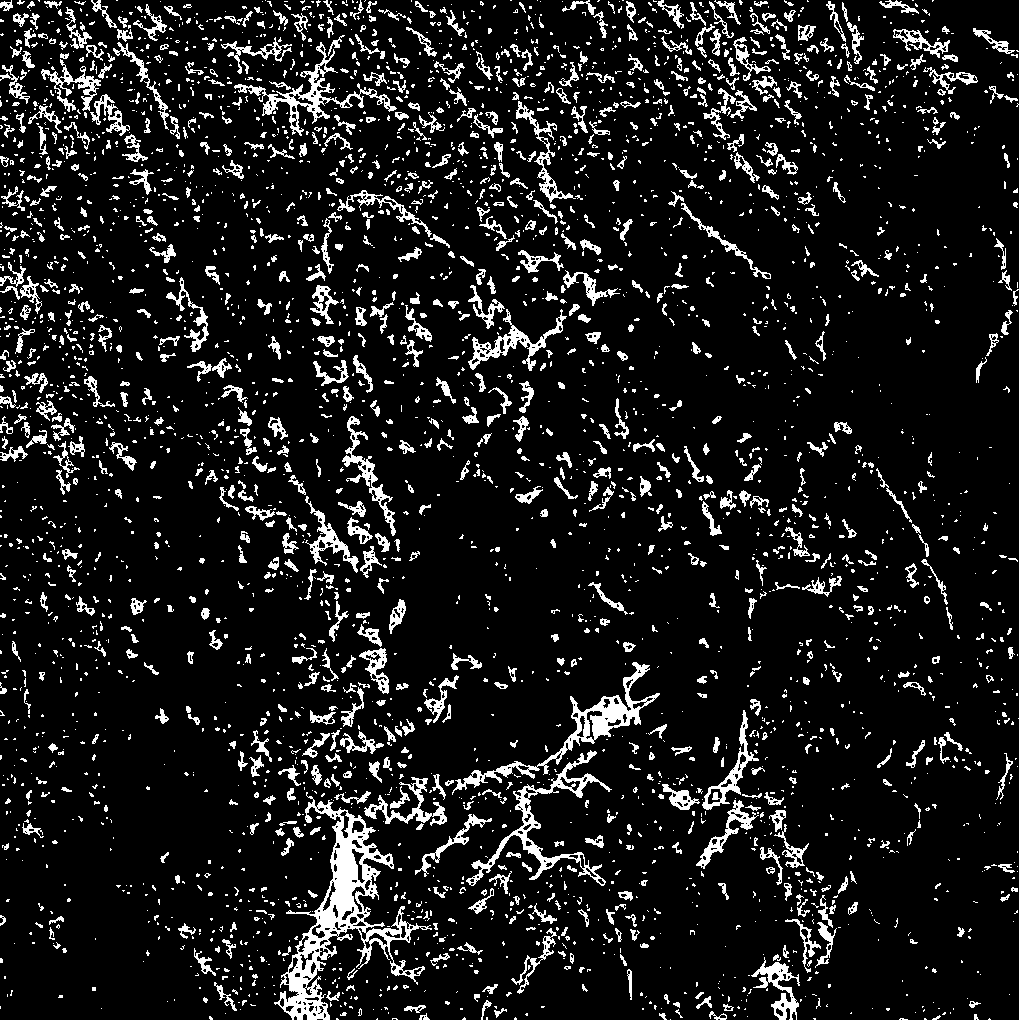

In [154]:
cv2_imshow(msk)

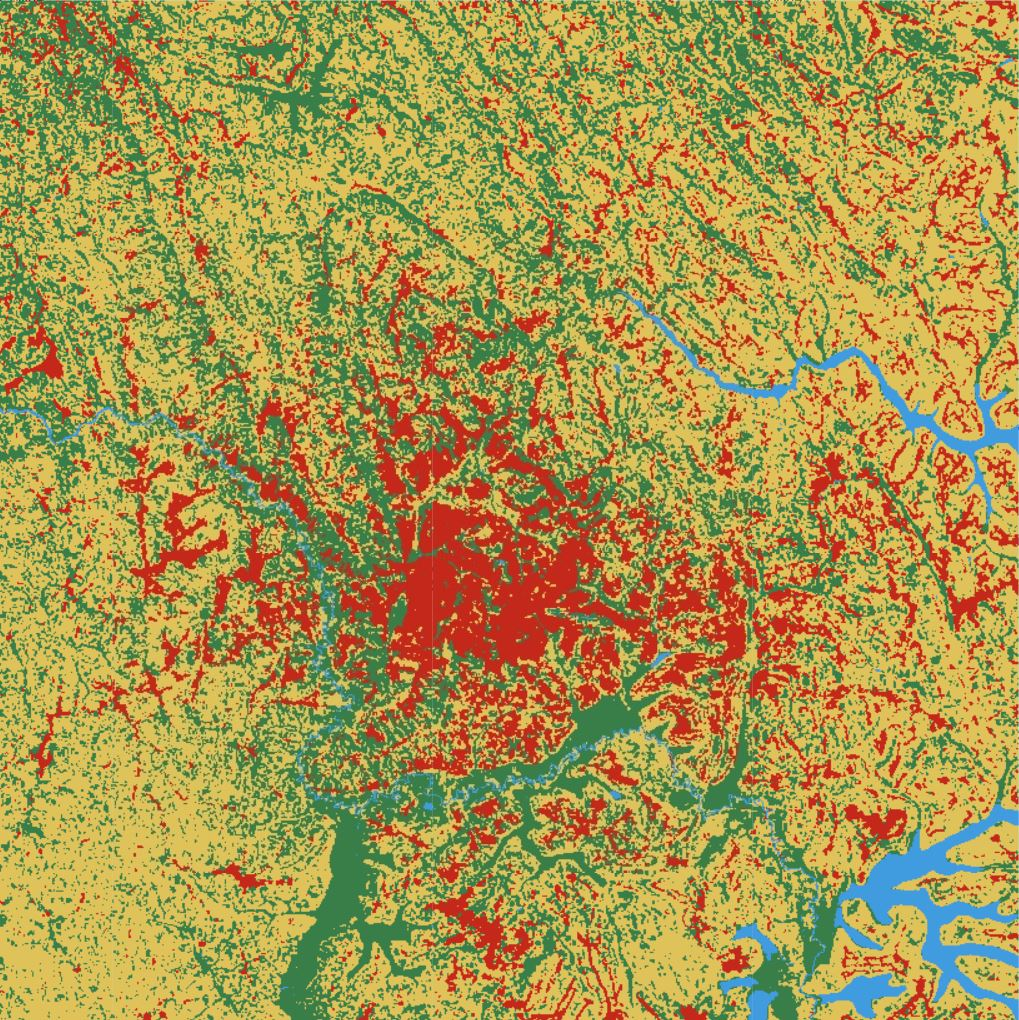

In [137]:
cv2_imshow(img)

In [121]:
calcPercentage(msk)

31.39